In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('salary.csv')
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [4]:
df.shape

(22770, 8)

In [5]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

In [ ]:
df.describe()
#df.describe(include = 'all')


,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [8]:
df.isnull().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [ ]:
df.drop_duplicates()
#df = df.drop_duplicates(subset=['Name'])  for removing a specific columns duplicates

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [ ]:
df.dropna()
#since there is only one null value i preferred dropping it instead of filling it or doing any other operations

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


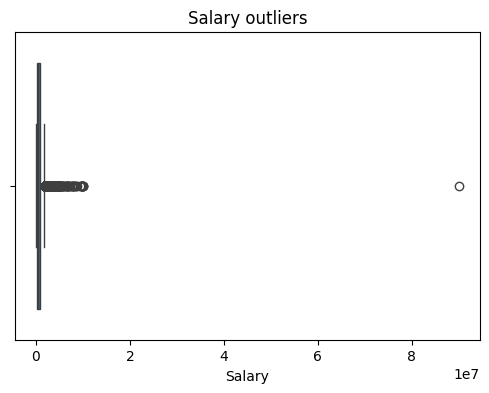

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Salary'])
plt.title("Salary outliers")
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [18]:
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
Q1,Q3

(np.float64(300000.0), np.float64(900000.0))

In [25]:
IQR = Q3 - Q1
IQR
lower_limit =  Q1-1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(np.float64(-600000.0), np.float64(1800000.0))

In [28]:
df = df[(df['Salary']>=lower_limit) & (df['Salary']<=upper_limit)]
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


[]

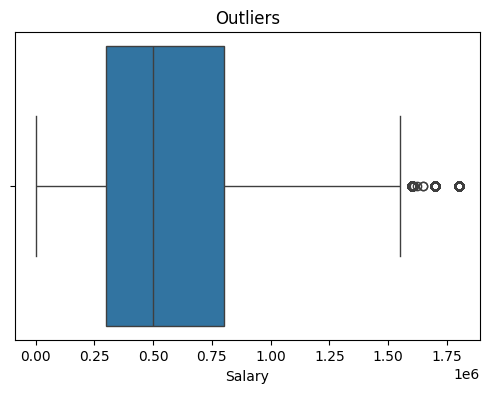

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Salary'])
plt.title('Outliers')
plt.plot()

In [31]:
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
Q1,Q3

(np.float64(300000.0), np.float64(800000.0))

In [32]:
IQR = Q3 - Q1
IQR
lower_limit =  Q1-1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(np.float64(-450000.0), np.float64(1550000.0))

In [33]:
df = df[(df['Salary']>=lower_limit) & (df['Salary']<=upper_limit)]
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


[]

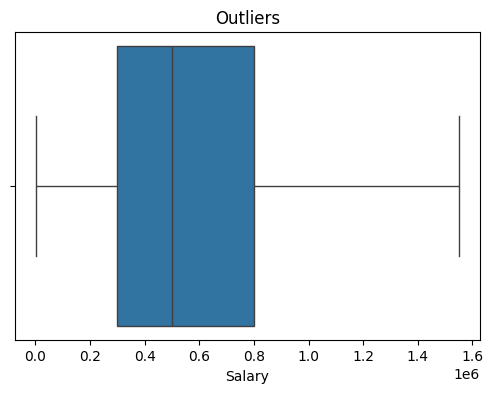

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Salary'])
plt.title('Outliers')
plt.plot()